In [3]:
import numpy as np
import matplotlib.pyplot as plt

Learning Outcome: Understand the components that build the FFT including the real and imaginary parts. The students will plot both parts and observe the symmetitry of the FFT, while finally plotting the one sided real part of the FFT. The question aim to calrify the understanding of the output of the FFT which desribes the frequency of sinusoids the original signal is composed of.

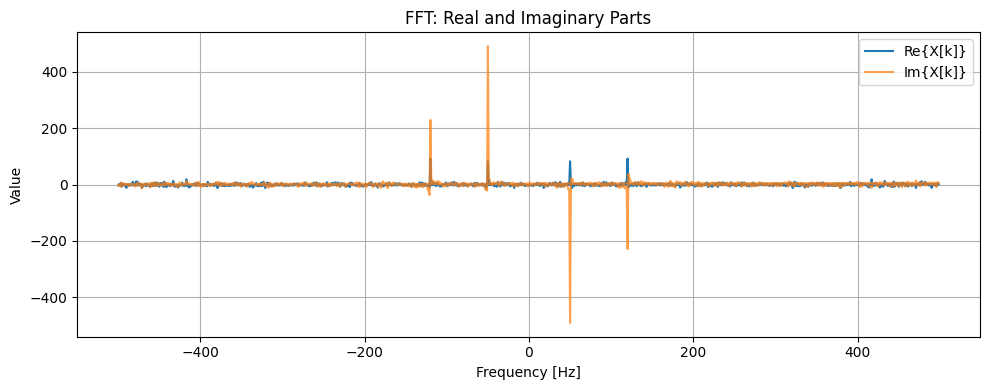

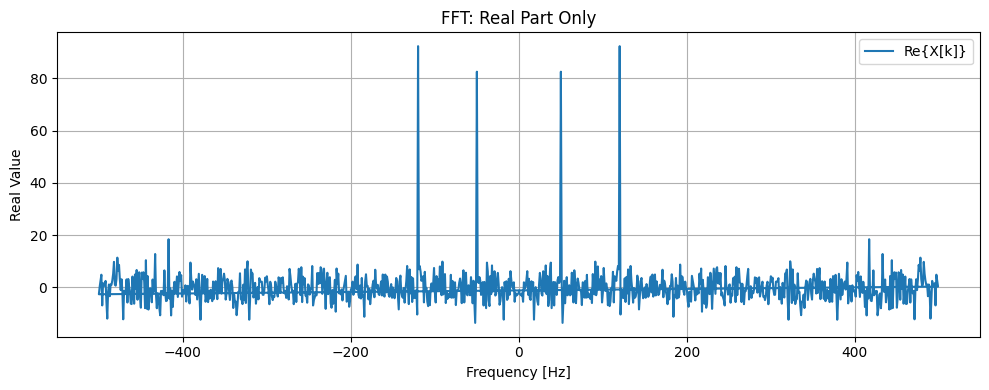

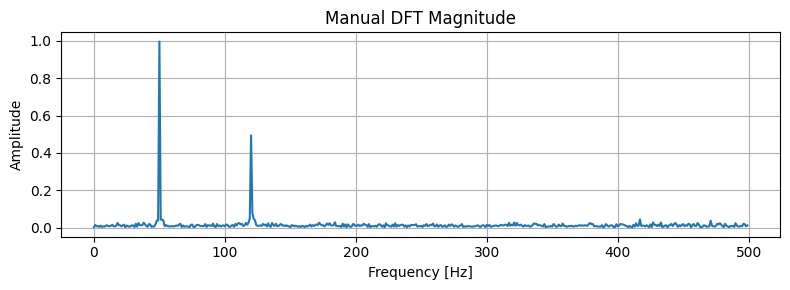

In [4]:

Fs = 1000      # sampling rate 
T  = 1.0       # duration
f1, f2 = 50, 120
A1, A2 = 1.0, 0.5
noise_std = 0.0


def make_signal(Fs=1000, T=1.0, f1=50, f2=120, A1=1.0, A2=0.5, noise=0.2):
    """
    Return number of samples N, the time vector t and signal x
    """
    # TODO: compute N from Fs and T
    N = int(Fs * T)  
    # TODO: build time vector t of length N over [0, T)
    t = np.linspace(0, T, N) 

    # TODO: construct the 2-tone signal with Gaussian noise
    x = (A1 * np.sin(2 * np.pi * f1 * t)+ A2 * np.sin(2 * np.pi * f2 * t)+ noise * np.random.randn(N))
    return t, x, N


    
t, x, N = make_signal(Fs=Fs, T=T, f1=f1, f2=f2, A1=A1, A2=A2)

# TODO: compute the fft
X = np.fft.fft(x)
freqs = np.fft.fftfreq(N, d=1/Fs)

# TODO: Plot both real and imaginary parts vs frequency
plt.figure(figsize=(10,4))
plt.plot(freqs, np.real(X), label='Re{X[k]}')
plt.plot(freqs, np.imag(X), label='Im{X[k]}', alpha=0.75)
plt.title('FFT: Real and Imaginary Parts')
plt.xlabel('Frequency [Hz]'); plt.ylabel('Value')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# TODO: Plot only real part vs frequency
plt.figure(figsize=(10,4))
plt.plot(freqs, np.real(X), label='Re{X[k]}')
plt.title('FFT: Real Part Only')
plt.xlabel('Frequency [Hz]'); plt.ylabel('Real Value')
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# TODO: Plot one sided real part with magnitude scaling
def plot_spectrum(X, Fs, title="Frequency Domian Magnitude"):
    """
    Create a function that plots the one sided real part magnitude of the frequency domain
    """
    N = X.size
    # TODO: build frequency axis in Hz using np.fft.fftfreq
    freqs = np.fft.fftfreq(N, d=1 / Fs)
    # TODO: mask non-negative frequencies
    mask = freqs >= 0
    # TODO: magnitude 
    mag = np.abs(X) / (N / 2 + (N == 1))

    plt.figure(figsize=(8, 3))
    plt.plot(freqs[mask], mag[mask])
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
plot_spectrum(X, Fs, title="Manual DFT Magnitude")



1) Explain what the real and imaginary parts represent physically

2) Why does the FFT of a real-valued signal produce a symmetric pattern around 0 Hz?

3) Identify the frequencies of the main peaks and explain why they occur there.

4) Why do we divide by (N/2) when plotting the magnitude? What does this scaling represent?


Learning Outcome: Allows the student to understand the difference between the DFT and the FFT by manually implementing the DFT. From this the student will observe the computation expense of the DFT and why the FFT was developed. The questions aim to dig into the intuition of the Fourier Transform rather than giving the student a surface level understanding by calling np.fft.fft(X).

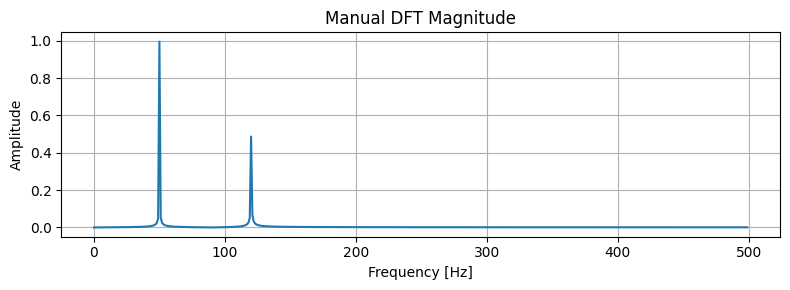

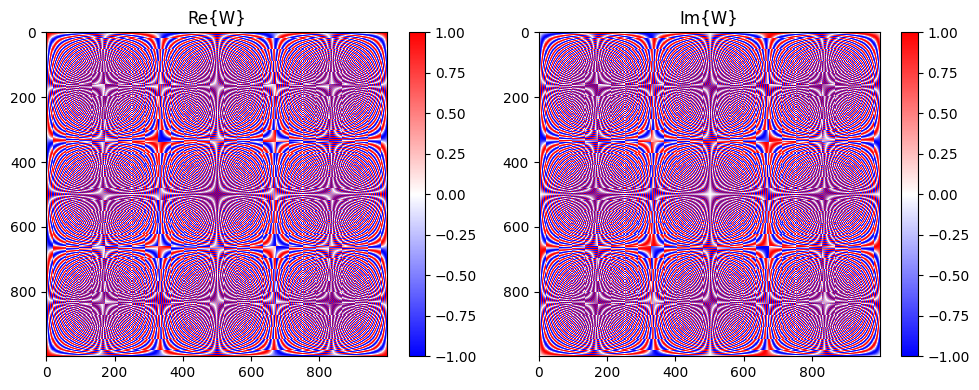

max |manual - fft| = 5.083384029544934e-11


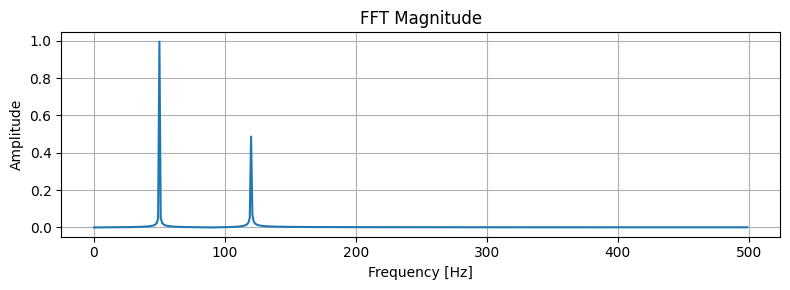

In [8]:

# DFT matrix 
def dft_matrix(N):
    """
    Build the NxN DFT matrix:
        W[k, n] = exp(-j 2 pi k n / N)
    """
    # TODO: create index arrays k (Nx1) and n (1xN)
    n = np.arange(N)
    k = n.reshape(N, 1)

    # TODO: fill in the exponential for W (use 1j for j = sqrt(-1))
    W = np.exp(-1j * 2 * np.pi * k * n / N)
    return W


# Manual DFT 
def manual_dft(x):
    """
    Compute the DFT via matrix-vector multiply:
        X = W @ x
    """
    N = x.size
    W = dft_matrix(N)
    # TODO: perform the matrix-vector multiply
    X = W @ x
    return X, W


def show_dft_matrix(W):
    """
    Visualize Re{W} and Im{W} as heatmaps. Red=positive, Blue=negative.
    """
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(np.real(W), aspect="auto", cmap="bwr", interpolation="nearest")
    plt.title("Re{W}")
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.imshow(np.imag(W), aspect="auto", cmap="bwr", interpolation="nearest")
    plt.title("Im{W}")
    plt.colorbar()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # TODO: choose parameters 
    Fs = 1000    
    T  = 1.0       
    f1 = 50        
    f2 = 120       
    A1, A2 = 1.0, 0.5
    noise = 0.0

    # Build signal
    t, x, N = make_signal(Fs=Fs, T=T, f1=f1, f2=f2, A1=A1, A2=A2, noise=noise)

    # Manual DFT
    X_manual, W = manual_dft(x)
    plot_spectrum(X_manual, Fs, title="Manual DFT Magnitude")
    show_dft_matrix(W)

    # TODO: compute FFT of x and compare with manual DFT
    X_fft = np.fft.fft(x)
    max_abs_diff = np.max(np.abs(X_manual - X_fft))
    print("max |manual - fft| =", max_abs_diff)

    # TODO: Plot the FFT now and compare this against your manual implementation
    plot_spectrum(X_fft, Fs, title="FFT Magnitude")


Look at the heatmaps of the real and imaginary parts of the DFT matrix W.

1) What do the colour patterns along each row represent in terms of sinusoidal frequency?

2) Explain why the DFT matrix can be interpreted as a set of basis sinusoids for analysing the signal.

3) Explain why the FFT produces the same result as the manual DFT but runs much faster.

4) How does changing the number of samples or sampling rate affect the resolution and spacing of frequency bins?

Learning Outcome: The student will now create a simple filter which will mask high frequencies. This will allow the understanding of transforming the signal from the time domain into the frequency domain which will then will be altered here. Once altered the signal will then be transformed back into the time domain by taking the inverse FFT. The reconstruction will be analysed using the signal noise ratio.

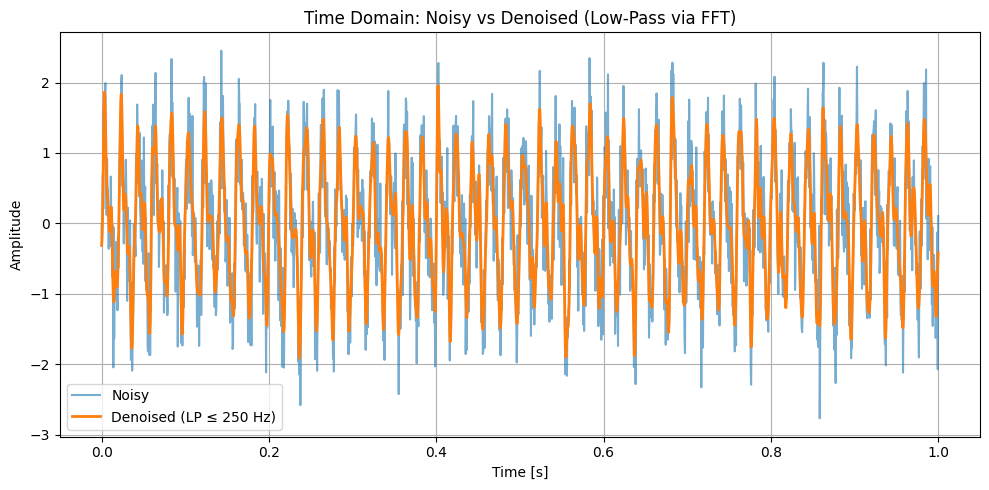

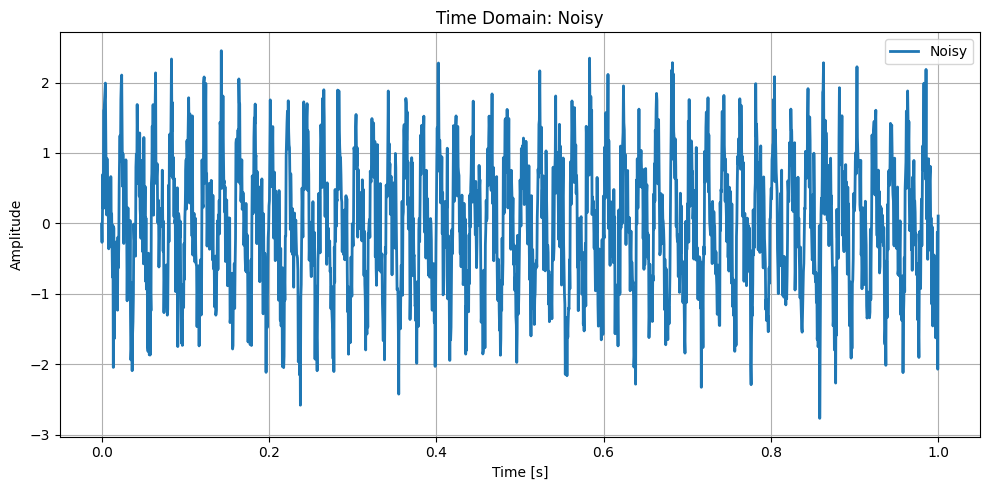

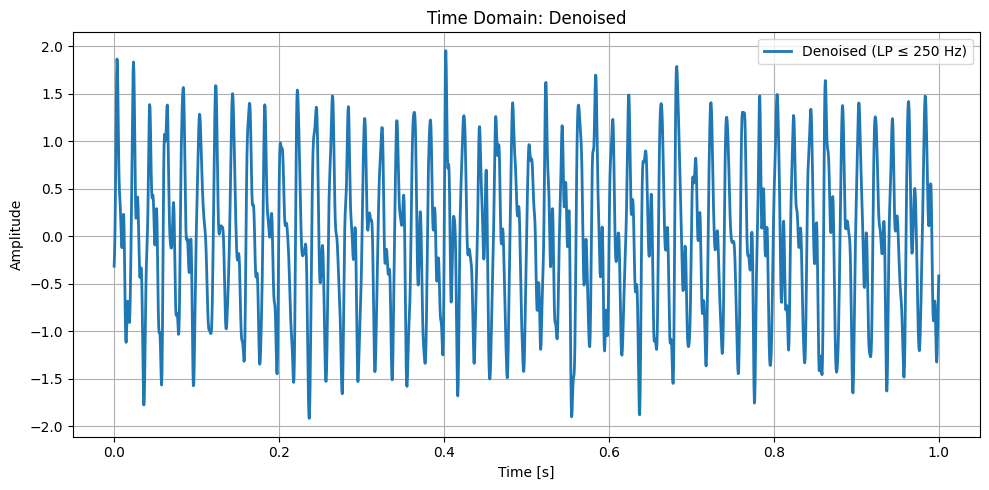

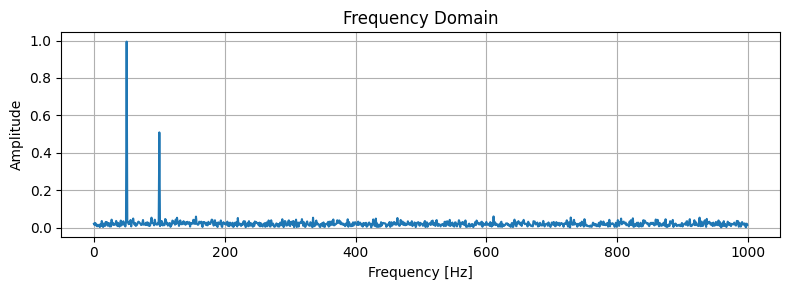

SNR (noisy)   : 4.24 dB
SNR (denoised): 9.66 dB


In [ ]:

Fs = 2000        # sampling rate 
T  = 1.0         # duration 
f_cut = 250      # TODO: cutoff frequency [Hz] 
noise_std = 0.5  # TODO: noise level 

# Make a test signal: two tones + noise
t, x_clean, N = make_signal(Fs=Fs, T=T, f1=f1, f2=f2, A1=A1, A2=A2, noise=0.0)
t, x, N = make_signal(Fs=Fs, T=T, f1=f1, f2=f2, A1=A1, A2=A2, noise=0.5)

# TODO: compute the fft
X = np.fft.fft(x)
freqs = np.fft.fftfreq(N, d=1/Fs)
# TODO: apply a mask for which frequncies to cut off
mask = (np.abs(freqs) <= f_cut)  
X_lp = X * mask
# TODO: inverse fft 
x_lp = np.real(np.fft.ifft(X_lp))


# TODO: Plot the noisy vs denoised signals
# TODO: Plot the frequency-domain magnitude
plt.figure(figsize=(10,5))
plt.plot(t, x, label='Noisy', alpha=0.6)
plt.plot(t, x_lp, label=f'Denoised (LP ≤ {f_cut} Hz)', linewidth=2)
plt.xlabel('Time [s]'); plt.ylabel('Amplitude')
plt.title('Time Domain: Noisy vs Denoised')
plt.grid(True); plt.legend()
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, x, label='Noisy', linewidth=2)
plt.xlabel('Time [s]'); plt.ylabel('Amplitude')
plt.title('Time Domain: Noisy')
plt.grid(True); plt.legend()
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, x_lp, label=f'Denoised (LP ≤ {f_cut} Hz)', linewidth=2)
plt.xlabel('Time [s]'); plt.ylabel('Amplitude')
plt.title('Time Domain: Denoised')
plt.grid(True); plt.legend()
plt.tight_layout(); plt.show()

# TODO: Plot the frequency-domain using the function we built earlier
plot_spectrum(X, Fs, title="Frequency Domain")


# TODO: Compare accuracy using SNR
def snr_db(ref, sig):
    num = np.sum(ref**2)
    den = np.sum((ref - sig)**2) + 1e-12
    return 10*np.log10(num/den)

print(f"SNR (noisy)   : {snr_db(x_clean, x):.2f} dB")
print(f"SNR (denoised): {snr_db(x_clean, x_lp):.2f} dB")


Inspect the plots of the noisy and denoised signals in both time and frequency domains.

1) What effect does the low-pass cutoff f_cut have on the signal’s spectrum?

2) How does this relate to the smoother appearance of the waveform in the time domain?

3) How does the low-pass filter change the SNR?


Learning Outcomes: Demonstrate how the FFT can be used to compute derivatives and allow the student to understand why the Fourier Transform proivides a more accurate derivative compared to the finite difference method by expanding the signal in global sinusoids. This should also provide the student with an understanding of the power of the Fourier Transform. 

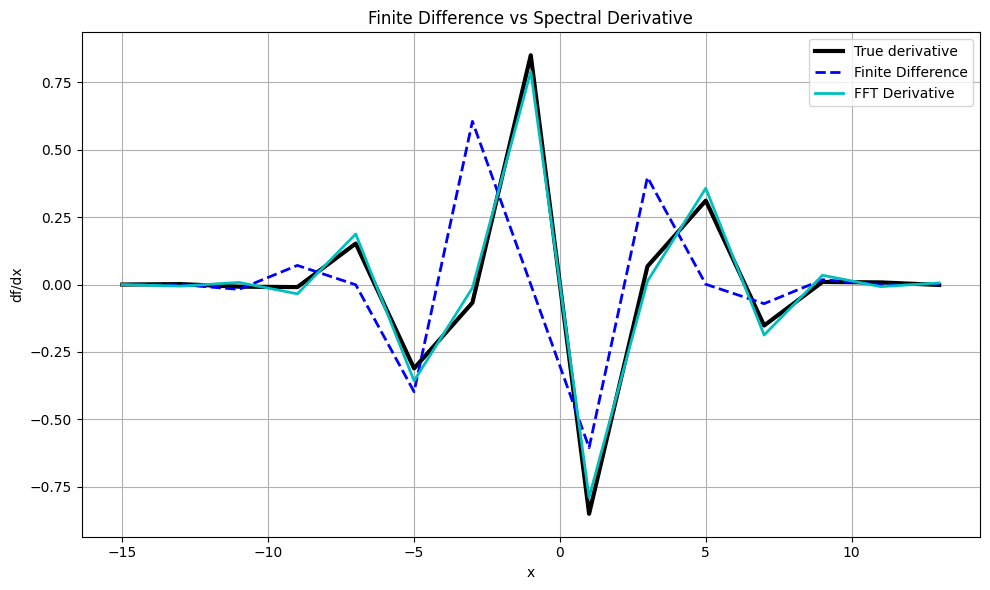

RMS Error (Finite Difference): 3.145e-01
RMS Error (FFT Derivative):    3.821e-02


In [ ]:

n = 15      # number of grid points
L = 30         # domain length
dx = L / n     # grid spacing
x = np.linspace(-L/2, L/2 - dx, n)  # uniform grid

#Function and true derivative
f = np.cos(x) * np.exp(-x**2 / 25)
df_true = ( -np.sin(x) * np.exp(-x**2 / 25) + ( -2*x/25 ) * np.cos(x) * np.exp(-x**2 / 25) )

# TODO: implement finite difference method for computing a derivative
#Finite difference derivative 
df_fd = np.zeros_like(f)
df_fd[:-1] = (f[1:] - f[:-1]) / dx
df_fd[-1] = df_fd[-2] 

# TODO: Compute the derivative using fft
# FFT derivative
f_hat = np.fft.fft(f)

kappa = 2*np.pi * np.fft.fftfreq(n, d=L/n)

df_hat = 1j * kappa * f_hat
# TODO: Inverse fourier transform to return this back into physical space
df_fft = np.real(np.fft.ifft(df_hat))


# TODO: Plot results
plt.figure(figsize=(10,6))
plt.plot(x, df_true, 'k', linewidth=3, label='True derivative')
plt.plot(x, df_fd, 'b--', linewidth=2, label='Finite Difference')
plt.plot(x, df_fft, 'c-', linewidth=2, label='FFT Derivative')
plt.title('Finite Difference vs Spectral Derivative')
plt.xlabel('x'); plt.ylabel("df/dx")
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()

# TODO: Plot error metrics
err_fd = np.sqrt(np.mean((df_fd - df_true)**2))
err_fft = np.sqrt(np.mean((df_fft - df_true)**2))

print(f"RMS Error (Finite Difference): {err_fd:.3e}")
print(f"RMS Error (FFT Derivative):    {err_fft:.3e}")


Look at the plotted results of the true derivative, the finite-difference derivative, and the FFT derivative.

1) Which method gives a closer match to the true derivative (try changing N to see this effect more clearly)?

2) Explain why this method performs better, based on how each approach computes derivatives.
